<center>
<h1>Tomato Price Analysis</h1>

<h1>🍅💲</h1>

<h5>Octavianus Bagaswara Adi</h5>
</center>

The Tomato Price Analysis project aims to explore and analyze the temporal dynamics of tomato prices using a comprehensive dataset spanning from 2014 to 2020. Given the inherent volatility and seasonality associated with agricultural commodity prices, this project applies time series analysis techniques to uncover underlying patterns and trends in tomato prices over the specified period. By examining historical price data, we seek to forecast future trends and provide actionable insights for stakeholders in the agricultural and food supply sectors.

Dataset: https://www.kaggle.com/datasets/ramkrijal/tomato-daily-prices

---

# 1. Exploratory Data Analysis

In [34]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels
import itertools
import sklearn.metrics
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5
import scipy

In [35]:
df = pd.read_csv('Tomato.csv')
df

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato
2,2013-06-18,Kg,22,26,24.0,Tomato
3,2013-06-19,Kg,24,28,26.0,Tomato
4,2013-06-20,Kg,22,26,24.0,Tomato
...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato
2737,2021-05-10,Kg,10,15,12.5,Tomato
2738,2021-05-11,Kg,10,15,12.5,Tomato
2739,2021-05-12,Kg,30,35,32.5,Tomato


The dataset contains several columns, but we observe that the `Unit` column has only a single unique value and is similar to the `Market` column. Therefore, it is advisable to drop this column. Additionally, since our analysis focuses on the `Average` price, we can remove the other columns. To facilitate better data grouping and analysis, we will decompose the `Date` column into `year`, `month`, `week`, and `day`.

In [36]:
df.drop(columns=['Market', 'Unit'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = [x for x in df['Date'].dt.year]
df['month'] = [x for x in df['Date'].dt.month]
df['week'] = df['Date'].apply(lambda x: x.week)
df['day'] = [x for x in df['Date'].dt.day_of_week]
df['day_str'] = [x.strftime('%a') for x in df['Date']]
df['year_month'] =  df['year'].astype(str) + "_" + df['month'].astype(str)
df = df.set_index('Date')
df = df[(df['year'] > 2013) & (df['year'] < 2021)]
df = df.drop(columns=['Minimum', 'Maximum'])
df = df.rename(columns={'Average':'Price'})
df

,Price,year,month,week,day,day_str,year_month
Date,,,,,,,
2014-01-01,32.5,2014,1,1,2,Wed,2014_1
2014-01-02,32.5,2014,1,1,3,Thu,2014_1
2014-01-03,32.5,2014,1,1,4,Fri,2014_1
2014-01-05,32.5,2014,1,1,6,Sun,2014_1
2014-01-06,32.5,2014,1,2,0,Mon,2014_1
...,...,...,...,...,...,...,...
2020-12-27,50.0,2020,12,52,6,Sun,2020_12
2020-12-28,52.5,2020,12,53,0,Mon,2020_12
2020-12-29,47.5,2020,12,53,1,Tue,2020_12


To begin the analysis, it is essential to describe the dataset by examining its statistical properties and visualizing the data distribution. First, we calculate key statistical values, such as the mean, standard deviation, maximum, and minimum, which provide insights into the central tendency, variability, and range of the data. Additionally, we create a box plot to visually represent the distribution, focusing on the median, interquartile range, and any outliers. 

In [37]:
df['Price'].describe()

count    2455.000000
mean       38.849491
std        16.967413
min        12.000000
25%        26.500000
50%        35.000000
75%        47.500000
max       117.500000
Name: Price, dtype: float64

<Axes: ylabel='Price'>

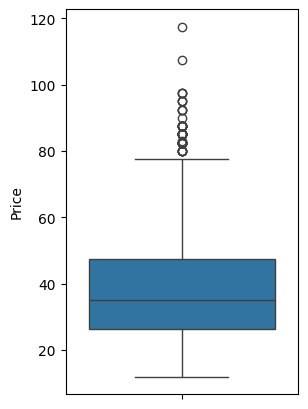

In [38]:
plt.figure(figsize=(3,5))
sns.boxplot(df['Price'])

The box plot highlights several outliers in the data, which may be influenced by underlying trends. For example, if there is a trend in the dataset, such as a long-term increase or decrease in prices, it can result in extreme values at certain time points, appearing as outliers. 

Next, we need to verify the presence of any missing values in the dataset. After conducting this check, we find that there are no null values in any of the columns. This ensures that our data is complete and clean, allowing us to proceed with further analysis without the need for data imputation or handling missing values. With this confirmation, we can confidently continue with our exploratory data analysis and modeling processes.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2455 entries, 2014-01-01 to 2020-12-31
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       2455 non-null   float64
 1   year        2455 non-null   int64  
 2   month       2455 non-null   int64  
 3   week        2455 non-null   int64  
 4   day         2455 non-null   int64  
 5   day_str     2455 non-null   object 
 6   year_month  2455 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 153.4+ KB


With the dataset now confirmed to be free of null values, we proceed by plotting the monthly average tomato prices. This visualization, using a line plot with time on the x-axis and price on the y-axis, helps us identify key patterns in the data. By examining the plot, we can discern long-term trends, such as upward or downward movements in prices, as well as seasonal fluctuations that recur at specific times of the year.

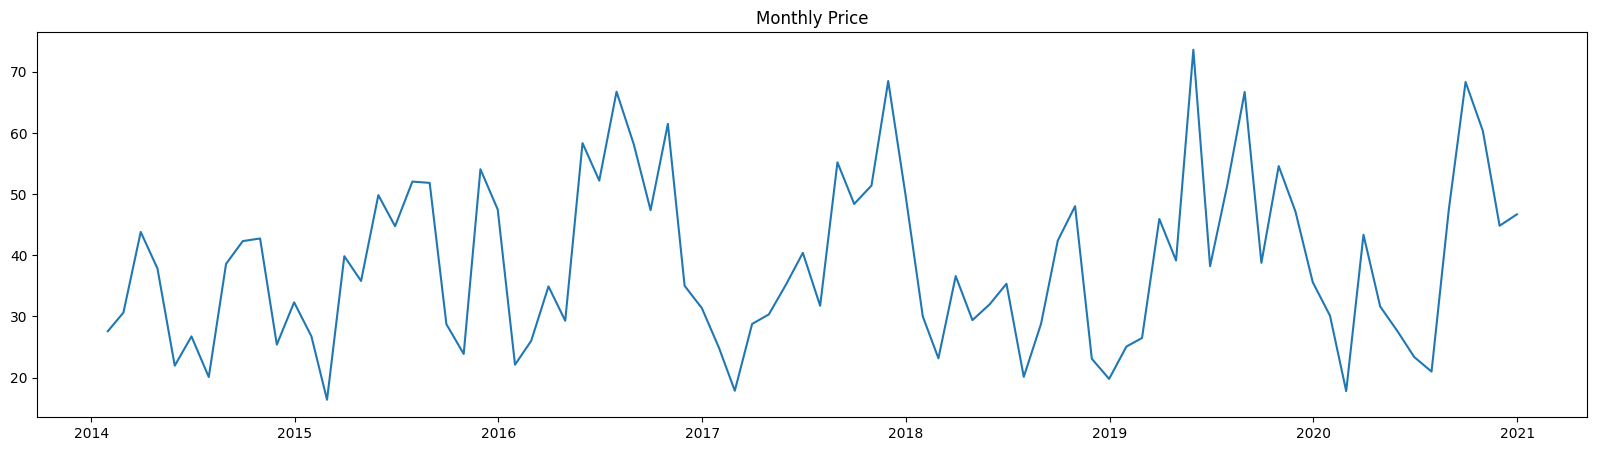

In [40]:
df_monthly = df['Price'].resample('M').mean()
plt.plot(df_monthly)
plt.title('Monthly Price')
plt.show()

The line plot of the monthly average tomato prices reveals noticeable seasonal patterns, which suggest recurring fluctuations at specific times of the year. These seasonal variations will be examined in more detail in subsequent analyses. 

For now, our next step is to investigate the distribution of the price data by generating a density plot. This will help us understand the overall distribution and density of price values, providing insights into the data’s distribution shape and identifying any potential skewness or multimodality.

<Axes: xlabel='Price', ylabel='Density'>

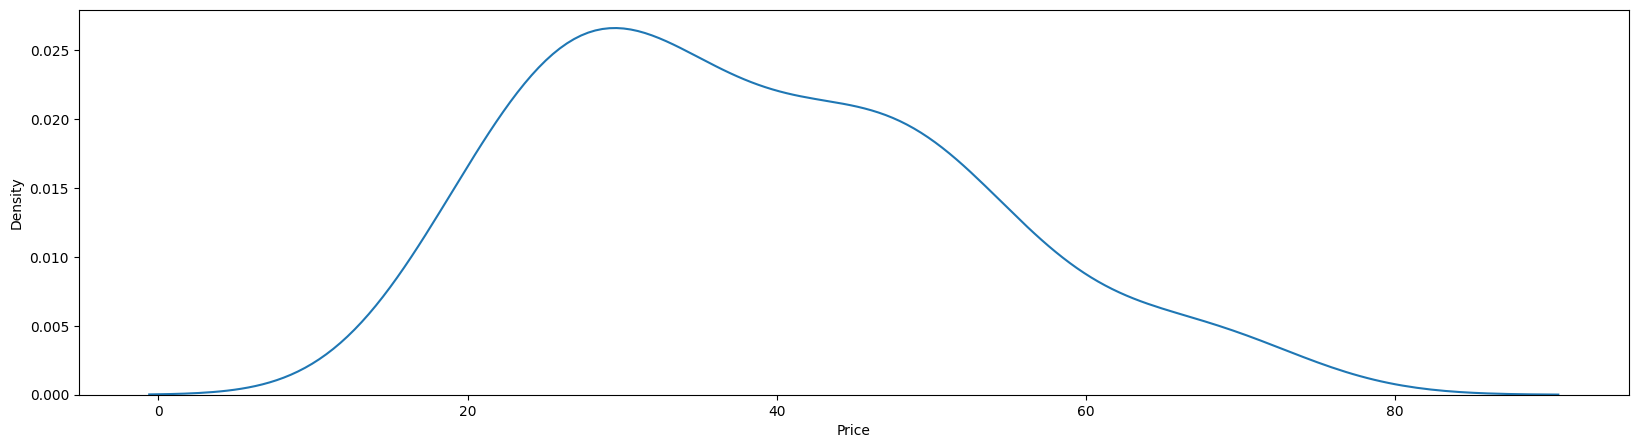

In [41]:
sns.kdeplot(df_monthly)

The density plot reveals that the price data is **skewed to the right**, indicating that the distribution of prices has a long tail on the higher end. This skewness can pose challenges for analysis and modeling, as many statistical methods and forecasting models assume normally distributed data or may perform poorly with skewed distributions. The presence of right skewness can lead to biases in parameter estimation, affect the accuracy of forecasts, and potentially impact the reliability of predictions. 

To address this issue, it may be necessary to apply transformations to normalize the distribution by using Box-Cox transformation and improve the effectiveness of subsequent analyses.

<Axes: xlabel='Price', ylabel='Density'>

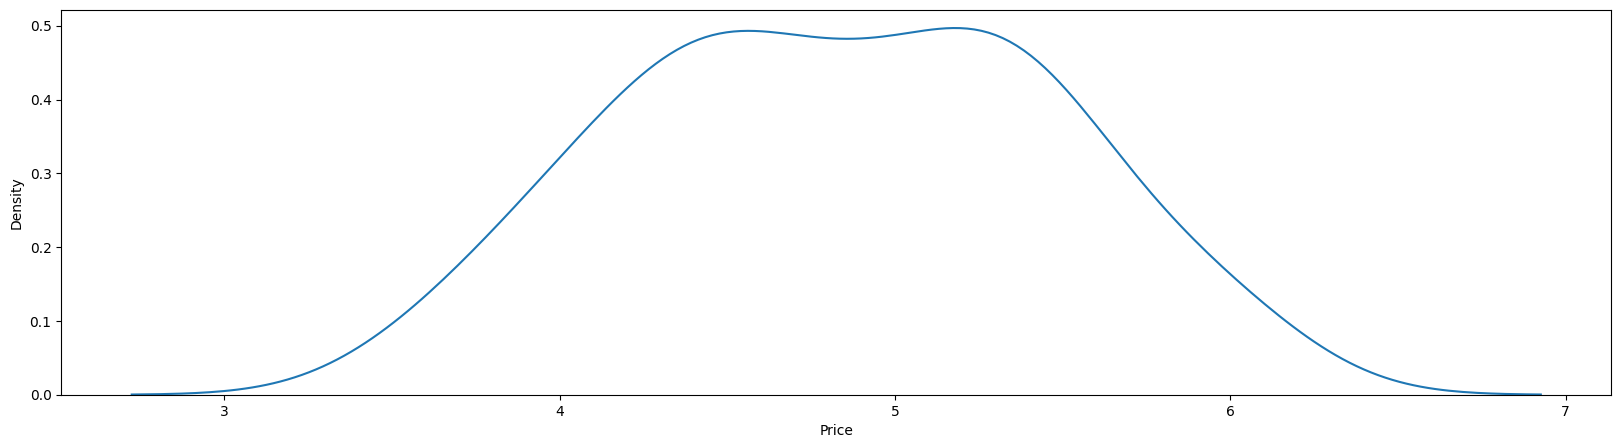

In [42]:
df_boxcox, lambda_ = scipy.stats.boxcox(df_monthly)
df_boxcox = pd.Series(df_boxcox, index=df_monthly.index)
df_boxcox.name = 'Price'
sns.kdeplot(df_boxcox)

The density plot has been normalized to address the skewness in the data. This normalization process adjusts the distribution, making it more suitable for further analysis and modeling. With the skewness effectively mitigated, the data is now better aligned with the assumptions of many statistical methods and forecasting models, allowing for more accurate and reliable insights in subsequent stages of the analysis.

# 2. Stationarity

Stationarity is crucial for the accuracy of forecasting models like ARIMA and SARIMA. Ensuring stationarity is vital for reliable model performance and can be evaluated through statistical tests such as the Augmented Dickey-Fuller (ADF) test, and data transformations aimed at stabilizing trends and variability.

In [43]:
adf_res = sm.tsa.stattools.adfuller(df_boxcox, autolag='AIC')
print('ADF Statistic: {}'.format(adf_res[0]))
print('p-value: {}'.format(adf_res[1]))
print('Critical Values')
for key, val in adf_res[4].items():
    print('{}, {}'.format(key, val))

ADF Statistic: -4.869679866296584
p-value: 3.993665423340428e-05
Critical Values
1%, -3.5194805351545413
5%, -2.9003945086747343
10%, -2.5874984279778395


Here, the p-value is below the significance level of 0.05, and the ADF statistic is less than all the critical values. Therefore, we reject the null hypothesis that the time series has a unit root and conclude that the time series **is stationary**.

# 3. Autocorrelation

Autocorrelation refers to the correlation of a time series with its own past values. It measures the degree to which current values in a time series are related to its previous values. 

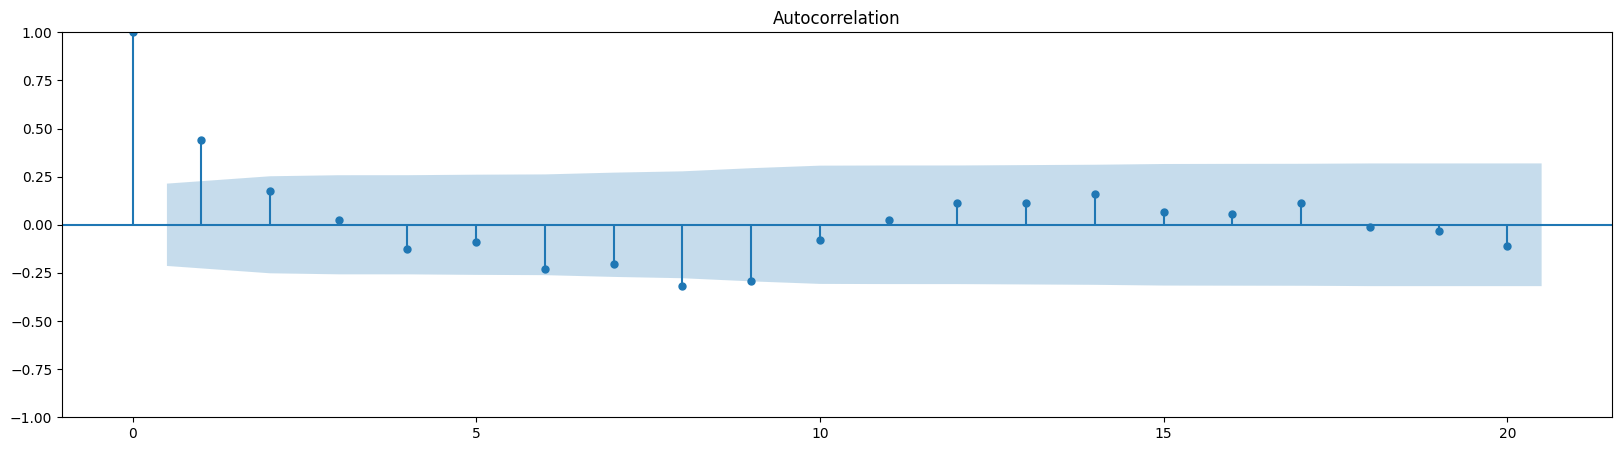

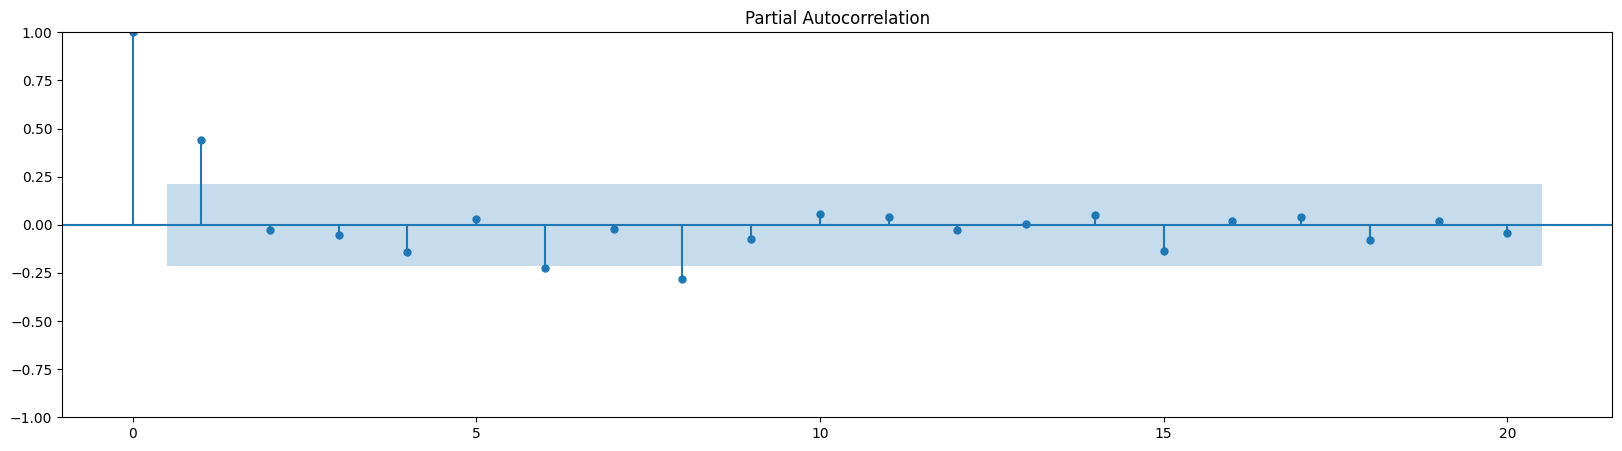

In [44]:
statsmodels.graphics.tsaplots.plot_acf(df_boxcox)
statsmodels.graphics.tsaplots.plot_pacf(df_boxcox)
plt.show()

The ACF and PACF plots show that correlations exceed the significance threshold at lags of 1 and 8, indicating the presence of seasonality with an **8-month cycle** in the data. This recurring pattern suggests that tomato prices follow an 8-month seasonal trend. We can use this 8-month period to inform our predictions and forecasting models for future tomato prices.

# 4. Trend and Seasonality

Trend refers to the long-term movement or direction in the data, indicating whether values are increasing, decreasing, or remaining stable over an extended period. Seasonality, on the other hand, represents regular, repeating patterns that occur at specific intervals, such as monthly or quarterly, due to seasonal factors or cyclical influences.

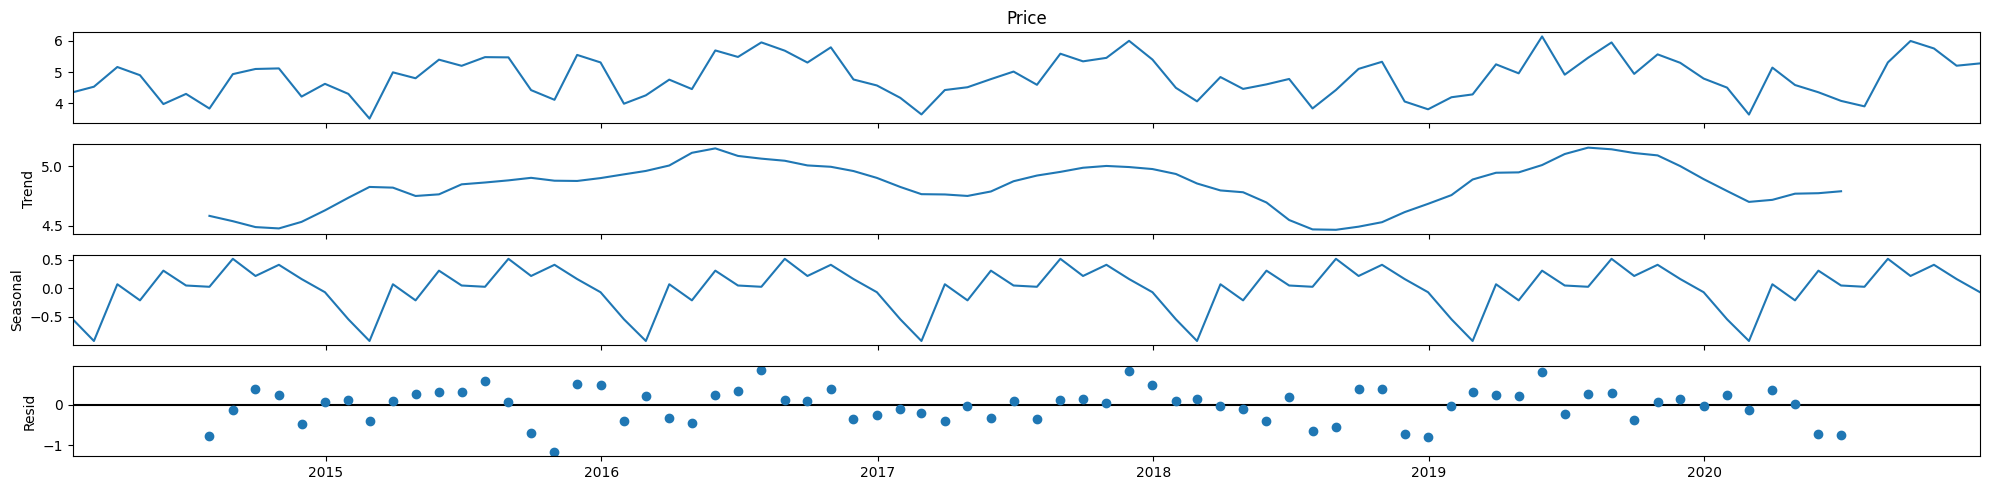

In [45]:
decompose = sm.tsa.seasonal_decompose(df_boxcox, model='additive')
decompose.plot()
plt.show()

The plot reveals a clear seasonal pattern in tomato prices, showing that **prices tend to peak during the 10th to 12th months of the year** and reach their **lowest point in the 2nd month**. Additionally, the trend in tomato prices appears **stable**, with no significant uptrend or downtrend, indicating that the prices remain relatively constant over time.

# 5. Forecast Modelling


Forecasting is a critical aspect of time series analysis, helping businesses and researchers make informed decisions by projecting future trends from past observations. Here, **SARIMAX** model will be used.

In [46]:
train = df_boxcox[:'2018']
test = df_boxcox['2019':]

print(len(train))
print(len(test))

60
24


In [47]:
p = q = np.arange(0, 3)
d = np.arange(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q))
best_pdq, best_seasonal_pdq, best_rmse = None, None, float('inf')
for comb in pdq:
    for seasonal_comb in seasonal_pdq:
        try:
            model = statsmodels.tsa.statespace.sarimax.SARIMAX(df_boxcox.copy(),
                                                                order=(comb[0], comb[1], comb[2]),
                                                                seasonal_order=(seasonal_comb[0], seasonal_comb[1], seasonal_comb[2], 8),
                                                                enforce_stationarity=False,
                                                                enforce_invertibility=False,
                                                                )
            model_fit = model.fit()
            pred = model_fit.predict(-len(test), -1)
            rmse = np.sqrt(sklearn.metrics.mean_squared_error(test, pred))

            if rmse < best_rmse:
                best_seasonal_pdq = seasonal_comb
                best_pdq = comb
                best_rmse = rmse
        except:
            continue

print('Best Param: {} x {} - 8 period, Best RMSE: {}'.format(best_pdq, best_seasonal_pdq, best_rmse))

Best Param: (np.int64(2), np.int64(0), np.int64(2)) x (np.int64(2), np.int64(1), np.int64(2)) - 8 period, Best RMSE: 0.4290218930771792


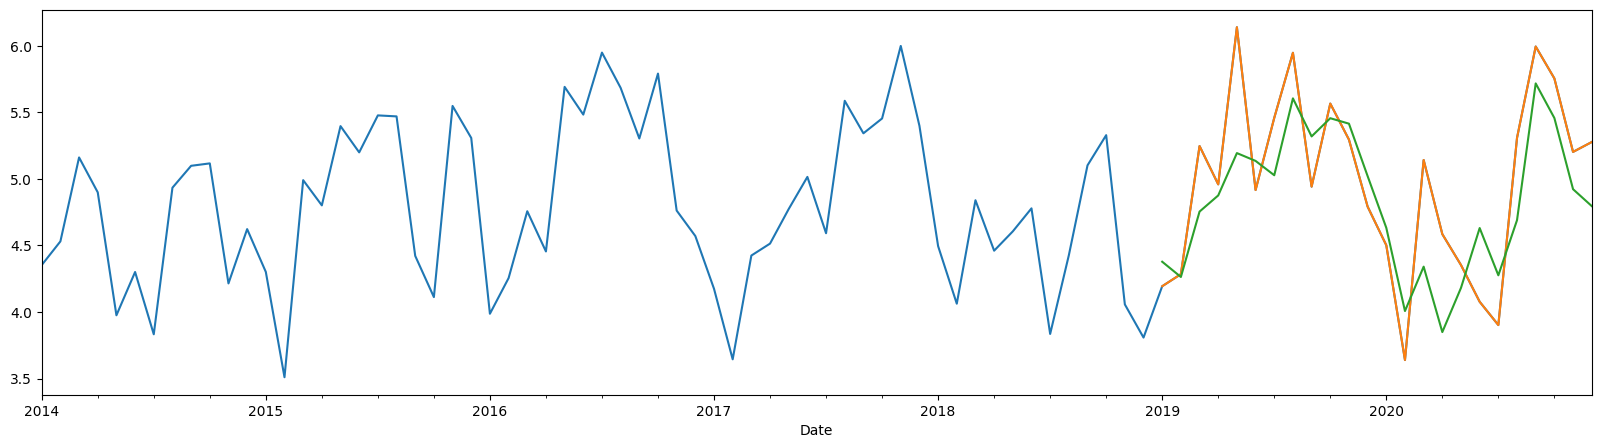

In [48]:
final_model = statsmodels.tsa.statespace.sarimax.SARIMAX(df_boxcox.copy(),
                                                        order=(best_pdq[0], best_pdq[1], best_pdq[2]),
                                                        seasonal_order=(best_seasonal_pdq[0], best_seasonal_pdq[1], best_seasonal_pdq[2], 8),
                                                        enforce_stationarity=False,
                                                        enforce_invertibility=False,
                                                        )
final_model_fit = final_model.fit()
pred = final_model_fit.predict(-len(test), -1)

df_boxcox.plot()
test.plot()
pred.plot()
plt.show()

The forecast model demonstrates an error of 0.429, indicating a relatively low level of prediction error and suggesting that the model effectively captures the underlying seasonal pattern of the data. A low error value reflects the model's accuracy in predicting future values based on historical data. 

To further validate the model's performance and ensure that it is adequately capturing the data's characteristics, we should perform the Diagnostics Plot.

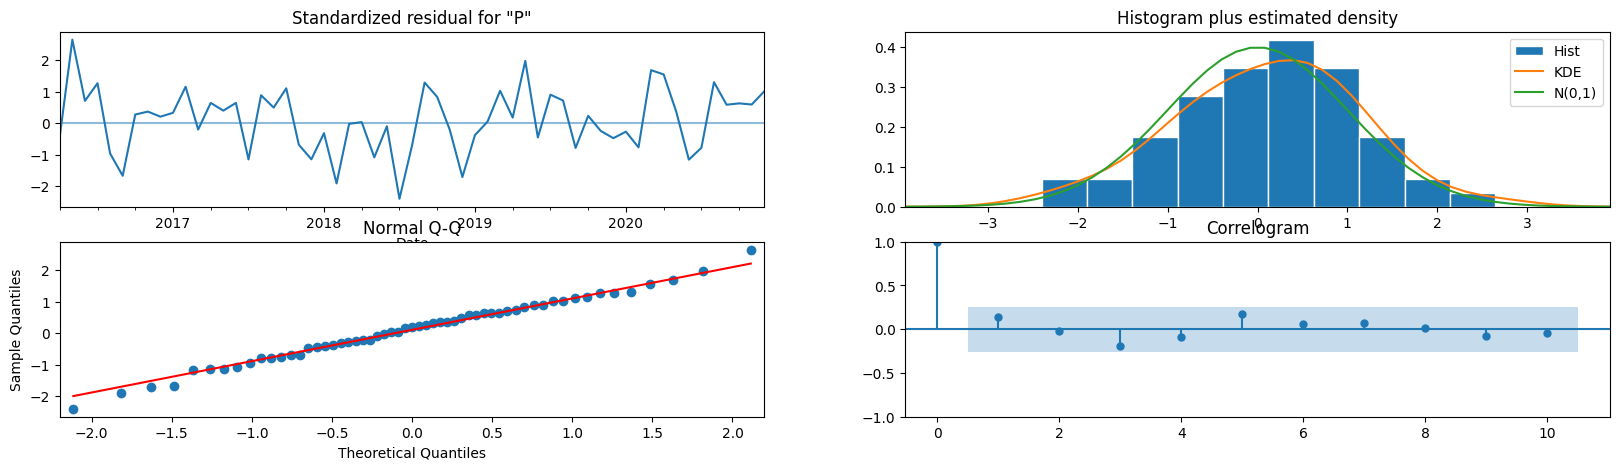

In [49]:
final_model_fit.plot_diagnostics()
plt.show()

The diagnostic plot reveals that the residuals resemble white noise. However, the histogram indicates a bias in the residuals, as the mean is not zero. Despite this, the correlogram shows no correlation in the residuals. Therefore, further adjustments to the dataset are necessary to address the bias.

In [50]:
mean_bias = final_model_fit.resid.mean()
mean_bias

np.float64(0.2544469720926115)

We can solve the bias problem by finding the mean of the residuals. Then, this mean of the residuals can be added to the forecast results later.

# 6. Forecasting 2 Years

This forecast provides estimates of tomato prices for the next 24 months, offering insights into expected price movements and trends. By visualizing these predictions alongside historical data, we can better understand potential future fluctuations and make informed business decisions based on anticipated market conditions.

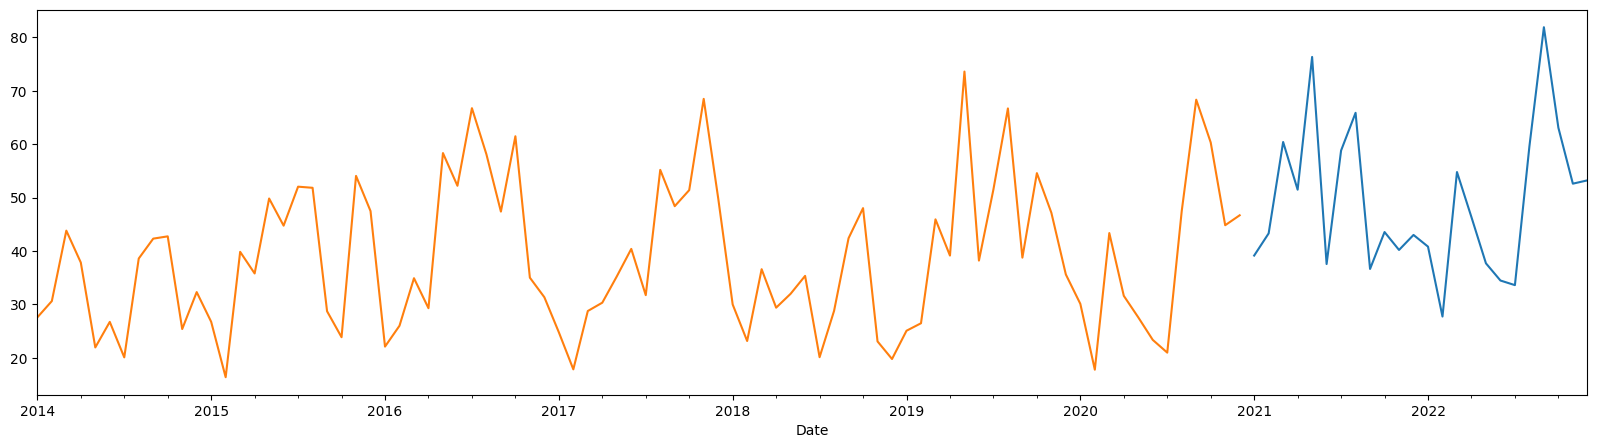

In [51]:
pred = final_model_fit.forecast(24)
df_forecast = scipy.special.inv_boxcox(pred + mean_bias, lambda_)

df_forecast.plot()
df_monthly.plot()
plt.show()

The analysis of tomato prices in 2021 and 2022 reveals a pattern of significant price fluctuations. Prices tend to oscillate between 30, with some peaks reaching as high as 80. This **volatility** suggests that the tomato market is highly sensitive to various factors, potentially including seasonal changes, supply chain disruptions, or varying demand.

It’s essential to **develop flexible supply chain strategies** that can quickly adapt to price changes. Distributors and retailers should focus on just-in-time inventory management to reduce waste while still taking advantage of price peaks. This approach involves closely monitoring price trends and adjusting procurement schedules to align with expected demand surges.